In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

In [2]:
num = 2
qr = QuantumRegister(num)
cr = ClassicalRegister(num)
circuit = QuantumCircuit(qr, cr)

In [3]:
for q in range(len(qr)):
    circuit.h(qr[q])

In [4]:
circuit.measure(qr, cr)

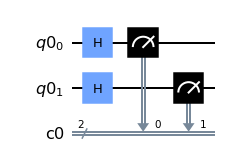

In [5]:
circuit.draw(output="mpl")

In [6]:
from qiskit import BasicAer
from qiskit.tools.monitor import job_monitor
#provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
provider = IBMQ.get_provider(hub='ibm-q-education', group='uni-antioquia-1', project='qc2021')
backend = provider.get_backend('ibmq_qasm_simulator') 
#backend = BasicAer.get_backend('qasm_simulator')
job = execute(circuit, backend=backend, shots=2048)
job_monitor(job)

Job Status: job has successfully run


{'00': 525, '01': 516, '10': 511, '11': 496}


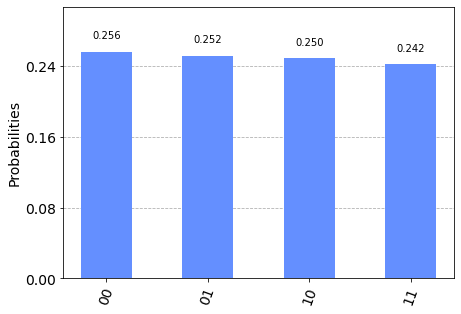

In [7]:
result = job.result()
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
res = result.get_counts(circuit)
print(res)
plot_histogram(res)
#La aleatoriedad de los números generados depende de la aleatoriedad de la distribución de médida
#de cada estado cuántico base, dentro del total de "shots" llevados a cabo.

In [8]:
numbers = []
for attr, value in sorted(res.items(), key=lambda item: item[1]):
    numQ = 0
    i = 0
    print("value=",value)
    print("attr=",attr)
    for ch in attr:
        print("ch=",ch)
        print("i=", i)
        if ch == '1':
            numQ += 2**i
        i = i + 1
    numbers.append(numQ)
    print("numQ=",numQ)
print("numbers=",numbers)

value= 496
attr= 11
ch= 1
i= 0
ch= 1
i= 1
numQ= 3
value= 511
attr= 10
ch= 1
i= 0
ch= 0
i= 1
numQ= 1
value= 516
attr= 01
ch= 0
i= 0
ch= 1
i= 1
numQ= 2
value= 525
attr= 00
ch= 0
i= 0
ch= 0
i= 1
numQ= 0
numbers= [3, 1, 2, 0]


In [9]:
provider = IBMQ.get_provider(hub='ibm-q-education', group='uni-antioquia-1', project='qc2021')
backend = provider.get_backend('ibm_lagos')
job = execute(circuit, backend=backend, shots=100)
job_monitor(job)

Job Status: job has successfully run


{'00': 21, '01': 25, '10': 27, '11': 27}


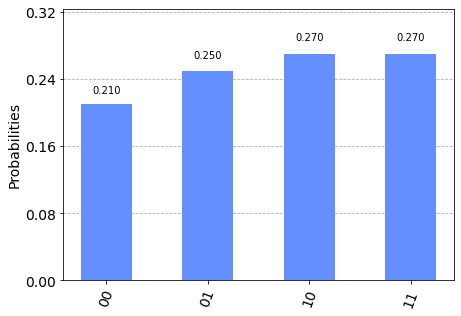

In [10]:
result = job.result()
from qiskit.tools.visualization import plot_histogram, plot_bloch_multivector
res = result.get_counts(circuit)
print(res)
plot_histogram(res)

In [11]:
numbers = []
for attr, value in res.items():
    numQ = 0
    i = 0
    for ch in attr:
        if ch == '1':
            numQ += 2**i
        i = i + 1
    numbers.append(numQ)
print("numbers=",numbers)

numbers= [0, 2, 1, 3]
